In [1]:
import numpy
import os

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
})

In [4]:
import pp_vis
import importlib
importlib.reload(pp_vis)

/nfs/home/jsewall/local/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<module 'pp_vis' from '/home/jsewall/misc/pp/2020/metrics/scripts/pp_vis.py'>

In [5]:
qual_colormap = plt.get_cmap("tab10")
plat_order=["OpenMP", "Kokkos", "CUDA", "OpenACC", "OpenCL"]
csv_root="../data/"

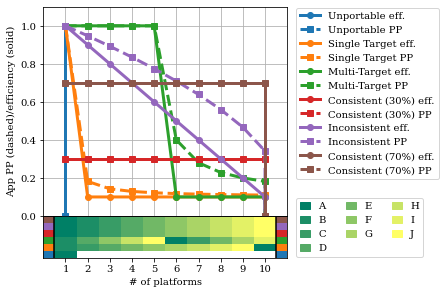

In [6]:
effs_df = pp_vis.app_effs(os.path.join(csv_root, "synthetic.csv"), raw_effs=True)

fig = plt.figure(figsize=(4, 4))
plat_colors = {}
plat_handles = []
synth_plats=effs_df[effs_df.columns[0]]
plat_cmap = plt.get_cmap("summer")
for i, p in enumerate(synth_plats):
    plat_colors[p] = plat_cmap(float(i)/(len(synth_plats)-1))
    plat_handles.append(mpatches.Patch(color=plat_colors[p], label=p))

handles = {}
gs = fig.add_gridspec(1,1)
index = [0, 0]
 
pp_vis.plot_cascade(fig, gs, index, effs_df, handles, app_colors=None, plat_colors=plat_colors)

handle_names, handle_lists = zip(*handles.items())
fig.legend(handle_lists, handle_names, loc='upper left', bbox_to_anchor=(1.0,1.0),ncol=1, handlelength=2.0)
fig.legend(handles=plat_handles, loc='lower left', bbox_to_anchor=(1.0,0.1), ncol=3, handlelength=1.0)
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
    
plt.savefig(f"../../images/synthetic_cascade.png", dpi = 300 ,bbox_inches="tight")

In [30]:
gpu_handles = []
cpu_handles = []
gpus=['K20', 'P100','V100','Turing','Radeon VII', 'Ampere']
cpus=['Skylake', 'KNL', 'Power 9', "Naples", "ThunderX2", 'NEC Aurora']
gpu_cmap = plt.get_cmap("summer")
cpu_cmap = plt.get_cmap("cool")
        
for i, p in enumerate(gpus):
    plat_colors[p] = gpu_cmap(float(i)/(len(gpus)-1))
    gpu_handles.append(mpatches.Patch(color=plat_colors[p], label=f"GPU{i}"))
for i, p in enumerate(cpus):
    plat_colors[p] = cpu_cmap(float(i)/(len(cpus)-1))
    cpu_handles.append(mpatches.Patch(color=plat_colors[p], label=f"CPU{i}"))

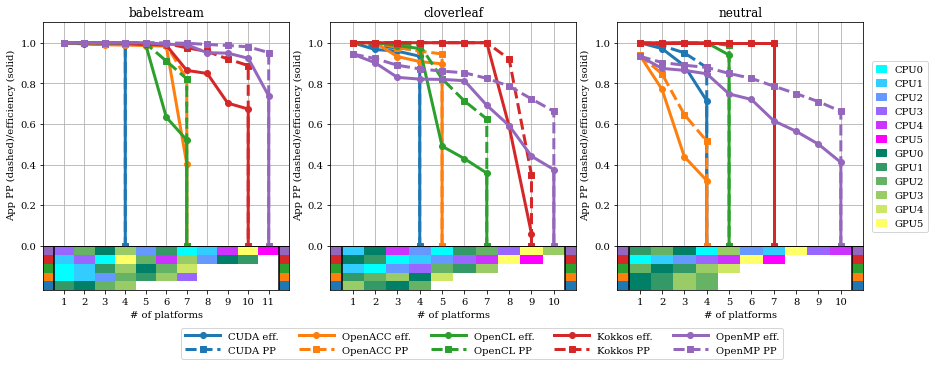

In [35]:
fig = plt.figure(figsize=(12, 5))

handles = {}
gs = fig.add_gridspec(1,3)
for i, appfile in enumerate(["babelstream.csv", "cloverleaf.csv", "neutral.csv"]):

    col = i-3*(i//3)
    row = i//3 
    index = [row, col]
    
    throughput=(appfile == "babelstream.csv")
    integrate=False
    appname=None
    effs_df = pp_vis.app_effs(os.path.join(csv_root, appfile), raw_effs=False, throughput=throughput)
    plats = effs_df[effs_df.columns[0]]
    
    appname = os.path.splitext(os.path.basename(appfile))[0]
    ax=pp_vis.plot_cascade(fig, gs, index, effs_df, handles, app_colors=None, plat_colors=plat_colors) 
    ax.set_title(appname)
handle_names, handle_lists = zip(*handles.items())
fig.legend(handle_lists, handle_names, loc='upper left', bbox_to_anchor=(0.20,0.11),handlelength=3.5, ncol=5)
fig.legend(handles=cpu_handles+gpu_handles, loc='upper left', bbox_to_anchor=(1.0,0.85),handlelength=1.0)

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(bottom=0.2)    
plt.savefig(f"../../images/app_platforms_cascade.png", dpi=300, bbox_inches="tight")